In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# **Data Cleaning**

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
#let's check for null values
print('\nNull values in train data:')
print(train_df.isnull().sum())
print('\nNull values in test data:')
print(test_df.isnull().sum())


Null values in train data:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Null values in test data:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [5]:
import warnings
warnings.filterwarnings("ignore")

#handlin missing values
def process_missing_values(df):

    df_copy = df.copy()
    categorical_columns = df_copy.select_dtypes(include=['object']).columns
    numerical_columns = df_copy.select_dtypes(include=['int64', 'float64']).columns

    for col in categorical_columns:
        df_copy[col].fillna(df_copy[col].mode()[0], inplace=True)

    for col in numerical_columns:
        df_copy[col].fillna(df_copy[col].mean(), inplace=True)
    
    return df_copy

processed_train_df = process_missing_values(train_df)
processed_test_df = process_missing_values(test_df)


In [6]:
for column in train_df.columns:
    missing_count = train_df[column].isnull().sum()
    if missing_count > 0:
        percentaje = missing_count / len(train_df) * 100
        print(f'Percentage of missing values in {column} is {percentaje:.2f}% ')

Percentage of missing values in HomePlanet is 2.31% 
Percentage of missing values in CryoSleep is 2.50% 
Percentage of missing values in Cabin is 2.29% 
Percentage of missing values in Destination is 2.09% 
Percentage of missing values in Age is 2.06% 
Percentage of missing values in VIP is 2.34% 
Percentage of missing values in RoomService is 2.08% 
Percentage of missing values in FoodCourt is 2.11% 
Percentage of missing values in ShoppingMall is 2.39% 
Percentage of missing values in Spa is 2.11% 
Percentage of missing values in VRDeck is 2.16% 
Percentage of missing values in Name is 2.30% 


In [7]:
print('\nNull values in train data:')
print(processed_train_df.isnull().sum())
print('\nNull values in test data:')
print(processed_test_df.isnull().sum())


Null values in train data:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

Null values in test data:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64


## Data Visualization

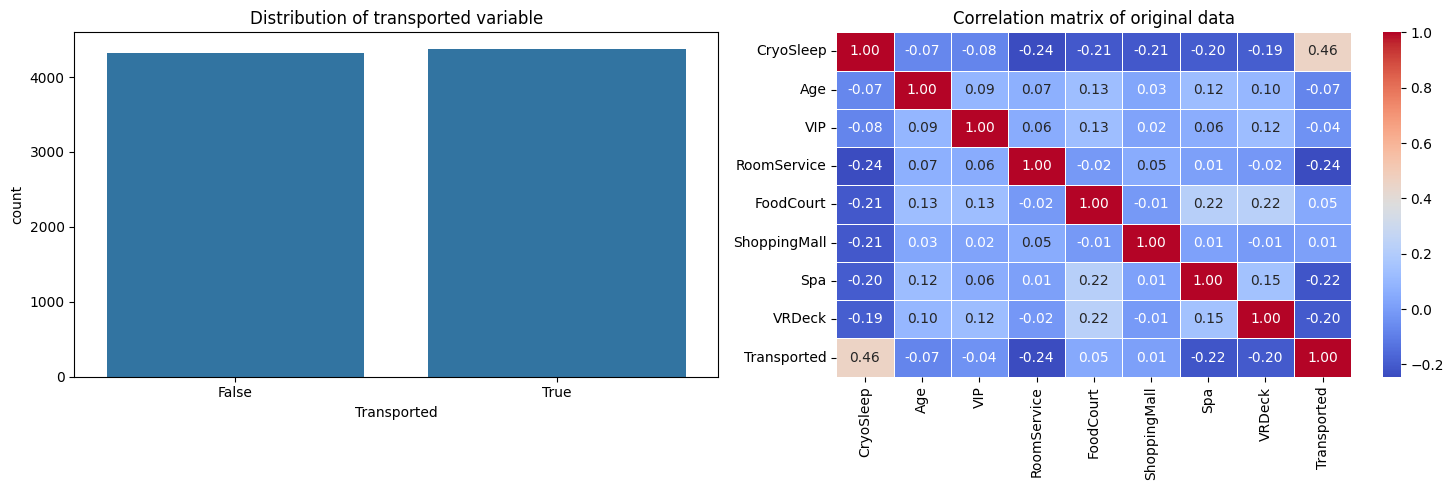

In [8]:
# Distribution of target variable

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data=processed_train_df, x='Transported', ax=ax[0])
ax[0].set_title('Distribution of transported variable')
corr = processed_train_df[processed_train_df.dtypes[processed_train_df.dtypes != 'object'].index].corr()
sns.heatmap(corr, annot=True, ax=ax[1], cmap='coolwarm', fmt=".2f", linewidths=0.5)
ax[1].set_title('Correlation matrix of original data')
plt.tight_layout()
plt.show()



In [9]:
correlations = processed_train_df[processed_train_df.dtypes[processed_train_df.dtypes != 'object'].index].corr()['Transported'].sort_values(ascending=False)
print(correlations)

Transported     1.000000
CryoSleep       0.460132
FoodCourt       0.046074
ShoppingMall    0.010019
VIP            -0.037261
Age            -0.074249
VRDeck         -0.204825
Spa            -0.218791
RoomService    -0.242048
Name: Transported, dtype: float64


In [10]:
class FeatureVisualizer:
    def __init__(self, data):
        self.data = data
        self.fig_size = (15, 10)
        
    def plot_numerical_feature(self, feature):
        """Plot distribution of numerical features by target class in both normal and log scale"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=self.fig_size)
        
        # Normal scale plots
        # Histogram
        sns.histplot(data=self.data, x=feature, hue='Transported', ax=ax1)
        ax1.set_title(f'Distribution of {feature} by Transport Status')
        
        # Boxplot
        sns.boxplot(data=self.data, y=feature, x='Transported', ax=ax2)
        ax2.set_title(f'Boxplot of {feature} by Transport Status')
        
        # Log transformed plots
        # Histogram
        sns.histplot(data=self.data, x=np.log1p(self.data[feature]), hue='Transported', ax=ax3)
        ax3.set_title(f'Log Distribution of {feature} by Transport Status')
        
        # Boxplot
        sns.boxplot(data=self.data, y=np.log1p(self.data[feature]), x='Transported', ax=ax4)
        ax4.set_title(f'Log Boxplot of {feature} by Transport Status')
        
        plt.tight_layout()
        plt.show()
        
    def plot_categorical_feature(self, feature):
        """Plot distribution of categorical features by target class"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Count plot
        sns.countplot(data=self.data, x=feature, hue='Transported', ax=ax1)
        ax1.set_title(f'Distribution of {feature} by Transport Status')
        ax1.tick_params(axis='x', rotation=45)
        
        # Percentage stacked bar
        prop_data = (self.data
                    .groupby(feature)['Transported']
                    .value_counts(normalize=True)
                    .unstack())
        prop_data.plot(kind='bar', stacked=True, ax=ax2)
        ax2.set_title(f'Proportion of Transport Status by {feature}')
        ax2.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()

In [11]:
categorical_columns = processed_train_df.select_dtypes(include=['object']).columns
categorical_columns


Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name'], dtype='object')

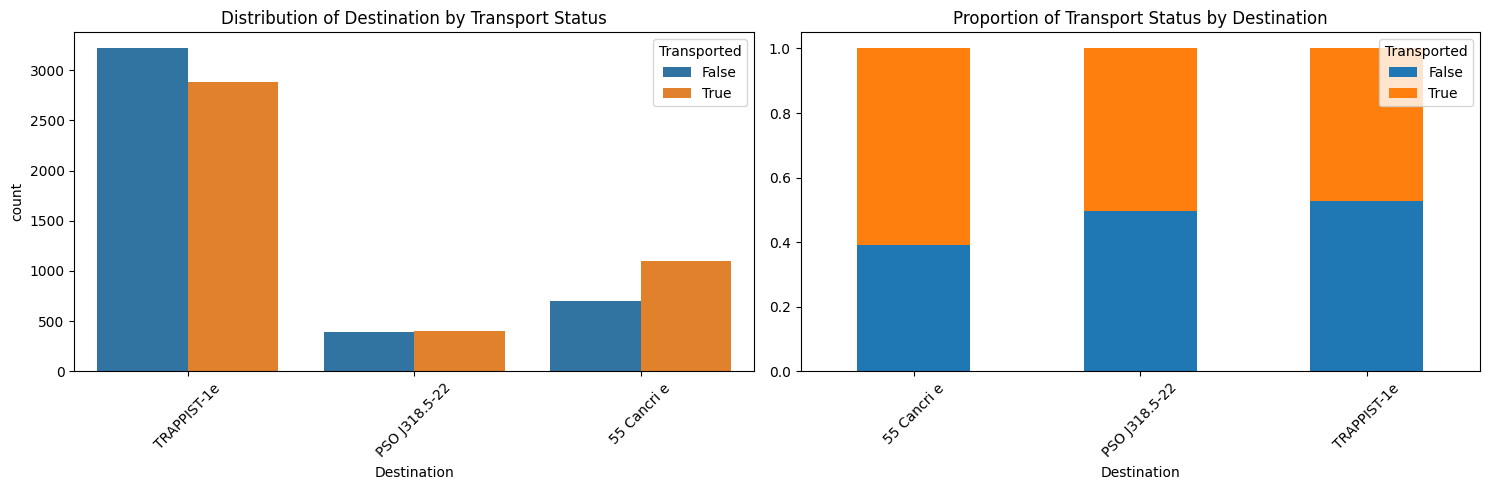

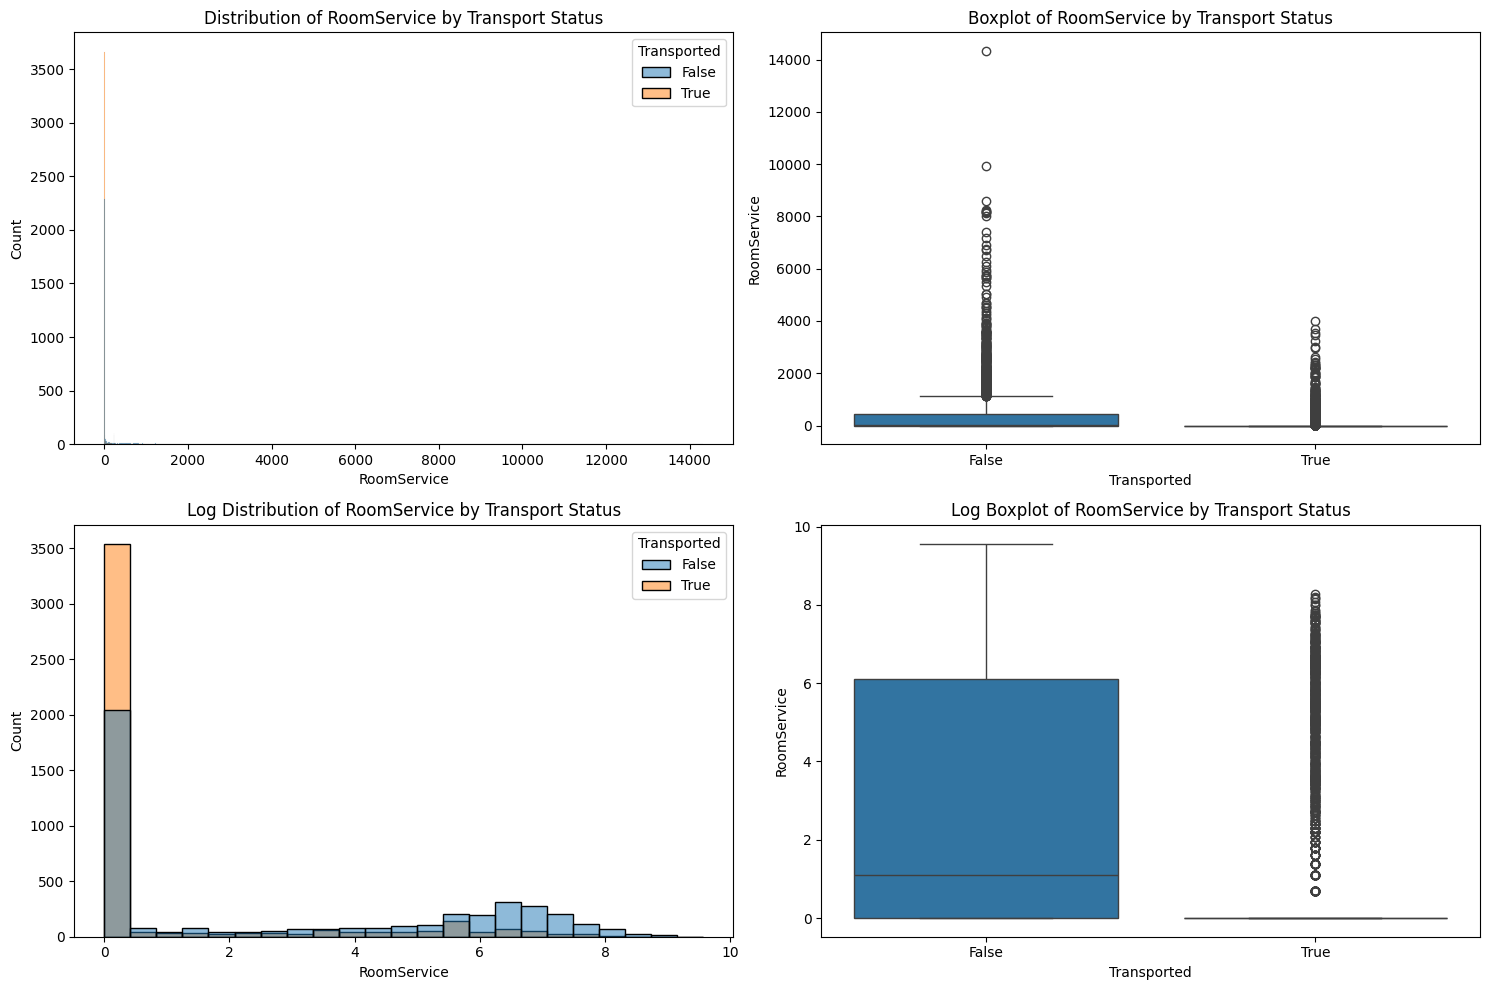

In [12]:
visualizer = FeatureVisualizer(processed_train_df)
visualizer.plot_categorical_feature('Destination')
visualizer.plot_numerical_feature('RoomService')

Age

+ Age between 0 and 18 is more likely to be transported so we can engineer this feature by creating two bins one for minors and another for adults

CryoSleep

+ CryoSleep true is more likely to be transported

FoodCourt       

+ Log transformation suits better for this feature
+ Outliers biased the distribution to the left

ShoppingMall

+ Log transformation suits better for this feature
+ Outliers biased the distribution to the left

VRDeck

+ Log transformation suits better for this feature
+ Outliers biased the distribution to the left

Spa

+ Log transformation suits better for this feature
+ Outliers biased the distribution to the left

RoomService

+ Log transformation suits better for this feature
+ Outliers biased the distribution to the left

Let's split name columns into Lastname and Firstname so that we can try to see if theres any relation for LastName with other features

## Feature Engineering

In [13]:
# Lets split name into first name and last name to find out if there are family members in the data and if that affects the target variable
processed_train_df[['FirstName', 'LastName']] = processed_train_df['Name'].str.split(n=1, expand=True)
processed_test_df[['FirstName', 'LastName']] = processed_test_df['Name'].str.split(n=1, expand=True)
processed_train_df.drop('Name', axis=1, inplace=True)
processed_test_df.drop('Name', axis=1, inplace=True)

processed_train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,FirstName,LastName
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,Maham,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,Juanna,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,Altark,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,Solam,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,Willy,Santantines


In [14]:
# Lets split the Cabin feature so that we can analyze if there's any relation in the asignation of cabins and the target variable
processed_train_df[['Deck', 'Number', 'Side']] = processed_train_df['Cabin'].str.split('/', expand=True)
processed_test_df[['Deck', 'Number', 'Side']] = processed_test_df['Cabin'].str.split('/', expand=True)
processed_train_df.drop('Cabin', axis=1, inplace=True)
processed_test_df.drop('Cabin', axis=1, inplace=True)

processed_train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,FirstName,LastName,Deck,Number,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,Maham,Ofracculy,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,Juanna,Vines,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,Altark,Susent,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,Solam,Susent,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,Willy,Santantines,F,1,S


In [15]:
print("Deck únicos:", processed_train_df['Deck'].unique())
print("Number únicos:", processed_train_df['Number'].unique())
print("Side únicos:", processed_train_df['Side'].unique())

Deck únicos: ['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']
Number únicos: ['0' '1' '2' ... '1892' '1893' '1894']
Side únicos: ['P' 'S']


In [16]:
# Theres not too much correlation between services variables and the target so lets unified them into a single variable
processed_train_df['Services'] = processed_train_df['RoomService'] + processed_train_df['FoodCourt'] + processed_train_df['ShoppingMall'] + processed_train_df['Spa'] + processed_train_df['VRDeck']
processed_test_df['Services'] = processed_test_df['RoomService'] + processed_test_df['FoodCourt'] + processed_test_df['ShoppingMall'] + processed_test_df['Spa'] + processed_test_df['VRDeck']
processed_train_df.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)
processed_test_df.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)

processed_train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,FirstName,LastName,Deck,Number,Side,Services
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,False,Maham,Ofracculy,B,0,P,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,True,Juanna,Vines,F,0,S,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,False,Altark,Susent,A,0,S,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,False,Solam,Susent,A,0,S,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,True,Willy,Santantines,F,1,S,1091.0


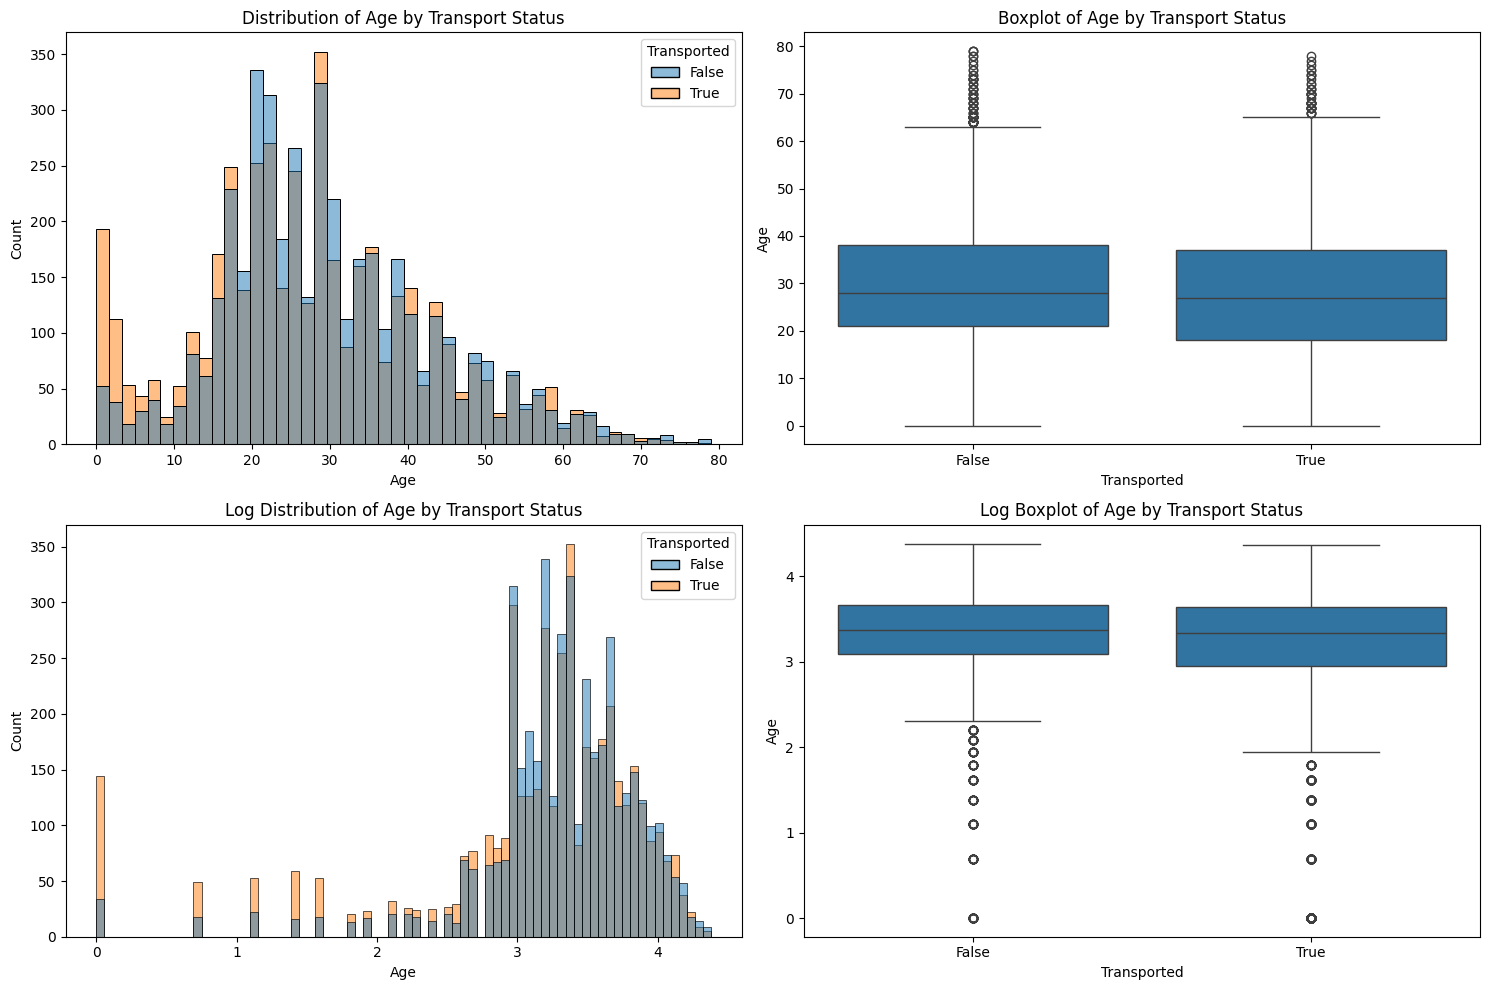

In [17]:
visualizer.plot_numerical_feature('Age')

In [18]:
# Lets create categories for range of Age since we see that range of age from 0 to 18 is more likeli to be transported
labels = ['Child', 'Teenager', 'Young Adult', 'Adult','Older Adult', 'Elderly']
bins = [0, 12, 18, 35, 50, 65, 100]
processed_train_df['GroupAge'] = pd.cut(processed_train_df['Age'], bins=bins, labels=labels, right=False)
processed_test_df['GroupAge'] = pd.cut(processed_test_df['Age'], bins=bins, labels=labels, right=False)
processed_train_df.head(5)


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,FirstName,LastName,Deck,Number,Side,Services,GroupAge
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,False,Maham,Ofracculy,B,0,P,0.0,Adult
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,True,Juanna,Vines,F,0,S,736.0,Young Adult
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,False,Altark,Susent,A,0,S,10383.0,Older Adult
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,False,Solam,Susent,A,0,S,5176.0,Young Adult
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,True,Willy,Santantines,F,1,S,1091.0,Teenager


In [19]:
processed_train_df = processed_train_df.drop(columns='Age')
processed_test_df = processed_test_df.drop(columns='Age')
processed_train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Transported,FirstName,LastName,Deck,Number,Side,Services,GroupAge
0,0001_01,Europa,False,TRAPPIST-1e,False,False,Maham,Ofracculy,B,0,P,0.0,Adult
1,0002_01,Earth,False,TRAPPIST-1e,False,True,Juanna,Vines,F,0,S,736.0,Young Adult
2,0003_01,Europa,False,TRAPPIST-1e,True,False,Altark,Susent,A,0,S,10383.0,Older Adult
3,0003_02,Europa,False,TRAPPIST-1e,False,False,Solam,Susent,A,0,S,5176.0,Young Adult
4,0004_01,Earth,False,TRAPPIST-1e,False,True,Willy,Santantines,F,1,S,1091.0,Teenager


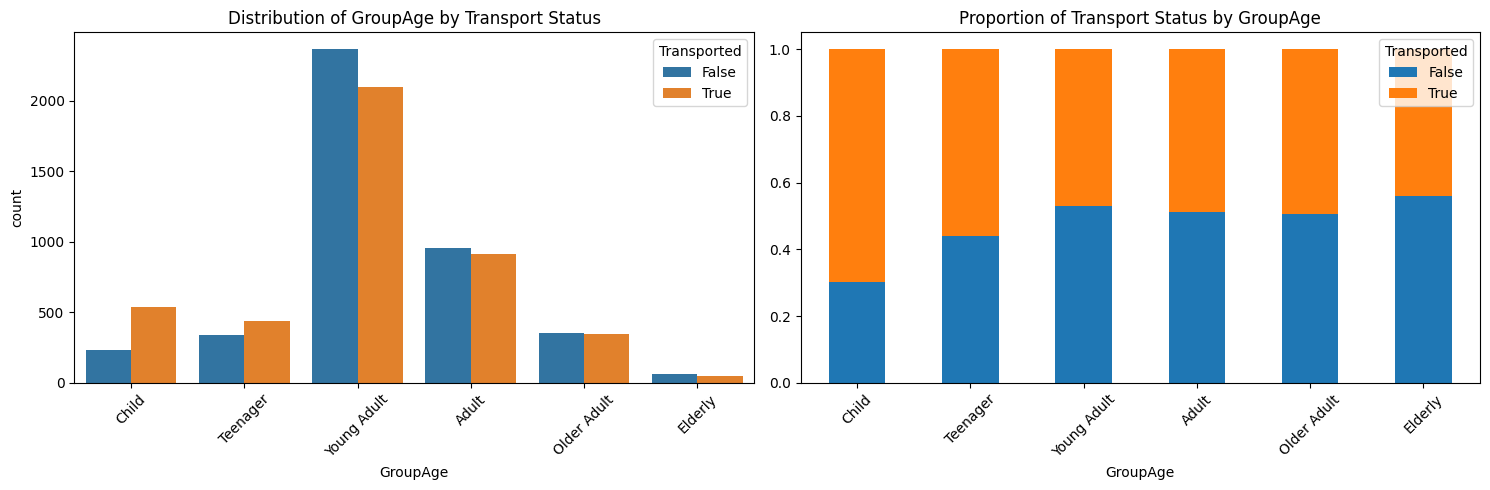

In [29]:
visualizer.plot_categorical_feature('GroupAge')

In [20]:
processed_train_df.sort_values(by='LastName')

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Transported,FirstName,LastName,Deck,Number,Side,Services,GroupAge
6540,6905_01,Earth,False,TRAPPIST-1e,False,False,Vana,Acobson,F,1322,S,871.000000,Adult
3957,4220_01,Earth,False,TRAPPIST-1e,False,False,Tine,Acobson,E,263,P,787.000000,Young Adult
6542,6905_03,Earth,False,55 Cancri e,False,True,Gaylah,Acobson,F,1322,S,796.000000,Teenager
6541,6905_02,Earth,False,TRAPPIST-1e,False,False,Lilasa,Acobson,E,460,S,982.000000,Teenager
5307,5671_01,Earth,False,TRAPPIST-1e,False,False,Berly,Acobsond,G,907,P,1800.000000,Teenager
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,3328_01,Earth,False,TRAPPIST-1e,False,False,Rena,Yorkland,F,691,P,901.000000,Young Adult
595,0618_02,Earth,False,PSO J318.5-22,False,False,Troyce,Yorkland,F,131,P,757.000000,Young Adult
892,0960_01,Earth,False,TRAPPIST-1e,False,False,Lorian,Youngrayes,E,72,S,964.729169,Young Adult
2213,2369_01,Earth,False,TRAPPIST-1e,False,False,Netty,Youngrayes,F,484,P,923.000000,Young Adult


There seem to be any relation beetween the id numbers and Lastname and Homeplanet, so let's split Passenger ID

In [21]:

processed_train_df[['Id ####', 'Id ##']] = processed_train_df['PassengerId'].str.split('_', expand=True )
processed_train_df

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Transported,FirstName,LastName,Deck,Number,Side,Services,GroupAge,Id ####,Id ##
0,0001_01,Europa,False,TRAPPIST-1e,False,False,Maham,Ofracculy,B,0,P,0.0,Adult,0001,01
1,0002_01,Earth,False,TRAPPIST-1e,False,True,Juanna,Vines,F,0,S,736.0,Young Adult,0002,01
2,0003_01,Europa,False,TRAPPIST-1e,True,False,Altark,Susent,A,0,S,10383.0,Older Adult,0003,01
3,0003_02,Europa,False,TRAPPIST-1e,False,False,Solam,Susent,A,0,S,5176.0,Young Adult,0003,02
4,0004_01,Earth,False,TRAPPIST-1e,False,True,Willy,Santantines,F,1,S,1091.0,Teenager,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,True,False,Gravior,Noxnuther,A,98,P,8536.0,Adult,9276,01
8689,9278_01,Earth,True,PSO J318.5-22,False,False,Kurta,Mondalley,G,1499,S,0.0,Young Adult,9278,01
8690,9279_01,Earth,False,TRAPPIST-1e,False,True,Fayey,Connon,G,1500,S,1873.0,Young Adult,9279,01
8691,9280_01,Europa,False,55 Cancri e,False,False,Celeon,Hontichre,E,608,S,4637.0,Young Adult,9280,01


Finding out for correlations with ID ####

In [30]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(processed_train_df['HomePlanet'], processed_train_df['Id ####'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

n = np.sum(contingency_table.values)
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Crámer coeficient: {cramers_v}")
print('P:',p)


Crámer coeficient: 0.993492856053621
P: 3.2780232159698303e-159


According to Cramer coeficient it seems to be an strong relationship beetween Home Planet and LastName, Between HomePlanet end ID ####... and Beetween Id #### and last name, so, let's create a new feature that indicate us if a person belongs to a family or groupp

In [ ]:
# Create new feature 'IsFamily'
processed_train_df['IsFamily'] = (
    processed_train_df.groupby(['LastName', 'Id ####', 'HomePlanet'])['LastName']
    .transform(lambda x: 1 if len(x) > 1 else 0)
)

# Verify Results
processed_train_df[['LastName', 'Id ####', 'HomePlanet', 'IsFamily']].head(10)

,LastName,Id ####,HomePlanet,IsFamily
0,Ofracculy,0,1,0
1,Vines,1,0,0
2,Susent,2,1,1
3,Susent,2,1,1
4,Santantines,3,0,0
5,Hinetthews,4,0,0
6,Jacostaffey,5,0,1
7,Jacostaffey,5,0,1
8,Beston,6,0,0
9,Flatic,7,1,1


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Convertir HomePlanet e ID a códigos numéricos
processed_train_df['HomePlanet'] = processed_train_df['HomePlanet'].astype('category').cat.codes
processed_train_df['Id ####'] = processed_train_df['Id ####'].astype('category').cat.codes
processed_train_df['Id ##'] = processed_train_df['Id ##'].astype('category').cat.codes

# Contar los apellidos repetidos
lastname_counts = processed_train_df['LastName'].value_counts()

# Filtrar solo los apellidos que aparecen más de una vez
repeated_lastnames = lastname_counts[lastname_counts > 1].index
filtered_df = processed_train_df[processed_train_df['LastName'].isin(repeated_lastnames)].copy()

# Convertir LastName en códigos numéricos SOLO en los repetidos
filtered_df['LastName'] = filtered_df['LastName'].astype('category').cat.codes

# Definir variables independientes (X) y dependiente (y)
X = filtered_df[['Id ####']]
y = filtered_df['HomePlanet']

# Separar en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")




Accuracy: 0.69


##  Custom Transdformers

In [ ]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None, log=False):
        # Verifica si X es un DataFrame
        if not isinstance(X, pd.DataFrame):
            raise TypeError('X must be a pandas DataFrame')
        return self

    def transform(self, X, y=None, log=True):
        # Verifica si X es un DataFrame
        if not isinstance(X, pd.DataFrame):
            raise TypeError('X must be a pandas DataFrame')

        # Realiza una copia de X para evitar modificar el DataFrame original
        X = X.copy()
        
        # Compara correctamente si log es False
        if log == False:
            # Aplica el método _used_services
            self._used_services(X)
        else:
            # Aplica la transformación logarítmica a las columnas correspondientes
            self._log_transform(X)
        
        return X

    def _used_services(self, X):
        # Crea la columna 'UseServices' como la suma de los servicios utilizados
        X['UseServices'] = (X['Spa'] + X['RoomService'] + X['FoodCourt'] + X['ShoppingMall'] + X['VRDeck'] > 0).astype(np.uint8)

        # Elimina las columnas originales de servicios
        X.drop(columns=['Spa', 'RoomService', 'FoodCourt', 'ShoppingMall', 'VRDeck'], inplace=True)

    def _log_transform(self, X):
        # Aplica una transformación logarítmica (log1p) a las columnas de servicios
        X[['Spa', 'RoomService', 'FoodCourt', 'ShoppingMall', 'VRDeck']] = np.log1p(X[['Spa', 'RoomService', 'FoodCourt', 'ShoppingMall', 'VRDeck']])


        

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

custom_preproc = make_pipeline(
    CustomTransformer()    
)

train_set_copy = train_df.copy()
train_set_copy = train_set_copy.drop(["Transported"], axis=1)

train_custom_preproc = custom_preproc.fit_transform(train_set_copy)
train_custom_preproc.head()

train_df


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,FirstName,LastName,Deck,Number,Side,GroupSize,HasRelative
0,0001_01,Europa,True,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,Maham,Ofracculy,B,3.0,P,1.0,False
1,0002_01,Earth,True,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,Juanna,Vines,F,4.0,S,3.0,True
2,0003_01,Europa,True,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,Altark,Susent,A,0.0,S,2.0,True
3,0003_02,Europa,True,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,Solam,Susent,A,1.0,S,2.0,True
4,0004_01,Earth,True,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,Willy,Santantines,F,5.0,S,4.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,True,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,74.0,Gravior Noxnuther,False,Gravior,Noxnuther,A,B_P_4195,P,1.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,0.0,Kurta Mondalley,False,Kurta,Mondalley,G,B_P_3695,S,1.0,False
8690,9279_01,Earth,True,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,0.0,Fayey Connon,True,Fayey,Connon,G,B_P_9545,S,6.0,True
8691,9280_01,Europa,True,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,3235.0,Celeon Hontichre,False,Celeon,Hontichre,E,B_P_3509,S,3.0,True


In [ ]:
from sklearn.model_selection import train_test_split
train_df['GroupSize'].fillna(train_df['GroupSize'].mean(), inplace=True)
X = train_df.drop(columns=['Transported', 'Name', 'LastName', 'FirstName', 'PassengerId', 'Number', 'Cabin'])
X['TotalSpent'] = X['RoomService'] + X['FoodCourt'] + X['ShoppingMall'] + X['Spa'] + X['VRDeck']
X.drop(columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], inplace=True)
X = pd.get_dummies(X)
y = train_df['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

<ipython-input-46-29bba5591cbe>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GroupSize'].fillna(train_df['GroupSize'].mean(), inplace=True)


In [ ]:
X

,CryoSleep,Age,VIP,GroupSize,HasRelative,TotalSpent,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,True,39.0,False,1.0,False,0.0,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
1,True,24.0,False,3.0,True,736.0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,True,58.0,True,2.0,True,10383.0,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
3,True,33.0,False,2.0,True,5176.0,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
4,True,16.0,False,4.0,True,1091.0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,True,41.0,True,1.0,False,8536.0,False,True,False,True,...,True,False,False,False,False,False,False,False,True,False
8689,True,18.0,False,1.0,False,0.0,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
8690,True,26.0,False,6.0,True,1873.0,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
8691,True,32.0,False,3.0,True,4637.0,False,True,False,True,...,False,False,False,False,True,False,False,False,False,True


## Modeling

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import cross_val_score, KFold
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from sklearn.neural_network import MLPClassifier

# # Set random seed
# np.random.seed(2)

# # Define models
# models = {
#     "DecisionTree": DecisionTreeClassifier(),
#     "RandomForest": RandomForestClassifier(),
#     "ExtraTrees": ExtraTreesClassifier(),
#     "AdaBoost": AdaBoostClassifier(),
#     "KNN": KNeighborsClassifier(),
#     "SVC": SVC(kernel='rbf', probability=True),
#     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
#     "GradientBoost": GradientBoostingClassifier(),
#     "NN": MLPClassifier()
# }

# # Initialize results storage
# results = []

# # Perform cross-validation
# k_folds = 10
# kf = KFold(n_splits=k_folds, shuffle=True, random_state=2)

# for model_name, model in models.items():
#     try:
#         # Train and evaluate model using cross-validation
#         scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
        
#         # Store accuracy and standard deviation
#         results.append({
#             "Model_Name": model_name,
#             "acc": np.mean(scores),
#             "std": np.std(scores)
#         })
#     except Exception as e:
#         print(f"Model {model_name} failed: {e}")

# # Convert results to DataFrame and display
# results_df = pd.DataFrame(results)
# print(results_df)



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Inicializar modelos
svc = SVC()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
gb = GradientBoostingClassifier()

In [ ]:

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Inicializar modelos
svc = SVC()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
gb = GradientBoostingClassifier()

# Aplicar GridSearchCV
svc_grid = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy')
xgb_grid = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy')
gb_grid = GridSearchCV(gb, param_grid_gb, cv=5, scoring='accuracy')


In [ ]:
# from tqdm import tqdm
# from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import GridSearchCV

# # Inicializar modelos
# svc = SVC()
# xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
# gb = GradientBoostingClassifier()

# # Aplicar GridSearchCV con barra de progreso
# def fit_with_progress(grid, X_train, y_train, desc):
#     param_combinations = list(grid.param_grid)
#     total_fits = len(param_combinations) * grid.cv
    
#     with tqdm(total=total_fits, desc=desc) as pbar:
#         def update_progress(*args, **kwargs):
#             pbar.update(1)
        
#         grid.fit(X_train, y_train)
#     return grid

# svc_grid = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy')
# xgb_grid = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy')
# gb_grid = GridSearchCV(gb, param_grid_gb, cv=5, scoring='accuracy')

# svc_grid = fit_with_progress(svc_grid, X_train, y_train, "Optimización de SVC")
# xgb_grid = fit_with_progress(xgb_grid, X_train, y_train, "Optimización de XGBoost")
# gb_grid = fit_with_progress(gb_grid, X_train, y_train, "Optimización de Gradient Boosting")

# # Mostrar mejores hiperparámetros
# print("Mejores hiperparámetros para SVC:", svc_grid.best_params_)
# print("Mejores hiperparámetros para XGBoost:", xgb_grid.best_params_)
# print("Mejores hiperparámetros para Gradient Boosting:", gb_grid.best_params_)


In [ ]:
stacking_model = StackingClassifier(
    estimators=[('svc', svc), ('xgb', xgb), ('gb',gb)],
    final_estimator=LogisticRegression(),
    cv=5
)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
blended_preds = cross_val_predict(stacking_model, X_train, y_train, cv=kf)
ensemble_accuracy = accuracy_score(y_train, blended_preds)
print(f'Stacking Model Accuracy: {ensemble_accuracy:.4f}')

Stacking Model Accuracy: 0.7446


In [ ]:
X = train_df.drop(columns=['Transported', 'Name', 'LastName', 'FirstName', 'PassengerId'])
X = pd.get_dummies(X)
y = train_df['Transported']

stacking_model.fit(X, y)



StackingClassifier(cv=5,
                   estimators=[('svc', SVC()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_c...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('gb', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
X = test_df.drop(columns=['PassengerId', 'Name', 'FirstName', 'LastName'])
X = pd.get_dummies(X)
test_df['Transported'] = stacking_model.predict(X)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Number_A_P_1777
- Number_A_P_4017
- Number_A_P_5408
- Number_A_P_5869
- Number_A_P_6164
- ...
Feature names seen at fit time, yet now missing:
- Cabin_A/0/P
- Cabin_A/0/S
- Cabin_A/1/S
- Cabin_A/10/P
- Cabin_A/10/S
- ...


In [ ]:
submission = test_df[['PassengerID', 'Transported']]
submission['Transported'] = submission['Transported'].astype(bool)
submission.to_csv('submission.csv', index=False)

print('Submission file created succesfully')

In [ ]:
X_train